# Deploy Stable Diffusion 2-1 with ezsmdeploy

Stable Diffusion is a text-to-image model that enables you to create photorealistic images from just a text prompt. A diffusion model trains by learning to remove noise that was added to a real image. This de-noising process generates a realistic image. These models can also generate images from text alone by conditioning the generation process on the text. For instance, Stable Diffusion is a latent diffusion where the model learns to recognize shapes in a pure noise image and gradually brings these shapes into focus if the shapes match the words in the input text.

Ezsmdeploy python SDK helps you easily deploy Machine learning models on SageMaker. It provides a rich set of features such as deploying models from hubs (like Huggingface or SageMaker Jumpstart), passing one or more model files (even with multi-model deployments), automatically choosing an instance based on model size or based on a budget, and load testing endpoints using an intuitive API.

In this notebook, you will learn how to use Ezsmdeploy to deploy stable diffusion model from JumpStart. You will learn how to use the predictor to generate artistic images and add negative prompts. 

NOTE: This notebook was tested on SageMaker Studio Data Science 3.0 Kernel on ml.t3.medium kernel

In [3]:
#If you have any previous version of ezsmdeploy installed, uninstall

%pip uninstall -y ezsmdeploy --quiet
%pip install ezsmdeploy==2.0.0

Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Restart Kernel

In [4]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)  

{'status': 'ok', 'restart': True}

## Setup

In [24]:
import ezsmdeploy
import matplotlib.pyplot as plt
import numpy as np
import json

In [42]:
def display_img_and_prompt(img, prmpt):
    """Display hallucinated image."""
    plt.figure(figsize=(12, 12))
    plt.imshow(np.array(img))
    plt.axis("off")
    plt.title(prmpt)
    plt.show()

## List Foundation models

In [2]:
#Check the foundation models from utils

ezsmdeploy.utils().list_foundation_models()

List of foundation models in Jumpstart: 

huggingface-text2text-bart4csc-base-chinese
huggingface-text2text-bigscience-t0pp
huggingface-text2text-bigscience-t0pp-bnb-int8
huggingface-text2text-bigscience-t0pp-fp16
huggingface-text2text-flan-t5-base
huggingface-text2text-flan-t5-base-samsum
huggingface-text2text-flan-t5-large
huggingface-text2text-flan-t5-small
huggingface-text2text-flan-t5-xl
huggingface-text2text-flan-t5-xxl
huggingface-text2text-flan-t5-xxl-bnb-int8
huggingface-text2text-flan-t5-xxl-fp16
huggingface-text2text-flan-ul2-bf16
huggingface-text2text-pegasus-paraphrase
huggingface-text2text-qcpg-sentences
huggingface-text2text-t5-one-line-summary


## Deploy Stable Diffusion V2-1 base model with ezSMDeploy

In [11]:
model_id = 'model-txt2img-stabilityai-stable-diffusion-v2-1-base'

In [12]:
ezonsm = ezsmdeploy.Deploy(model=model_id,foundation_model=True)

0:00:00.177889 | created model(s). Now deploying on ml.p3.2xlarge
0:06:03.013755 | deployed model
0:06:03.013852 | Done! ✔ 


## Run Inferencing on deployed model

In [37]:
prompt_text = "Empire state building, realistic style"
content_type = "application/x-text"
accept = "application/json"
image_w = 512
image_h = 512

payload = {"prompt": prompt_text, "width": image_w, "height": image_h}
encoded_payload = json.dumps(payload).encode("utf-8")

query_response = ezonsm.predictor.predict(
        encoded_payload,
        {
            "ContentType": content_type,
            "Accept": accept,
        },
    )

In [38]:
query_response.keys()

dict_keys(['generated_image', 'prompt'])

In [39]:
img,prompt = query_response["generated_image"], query_response["prompt"]

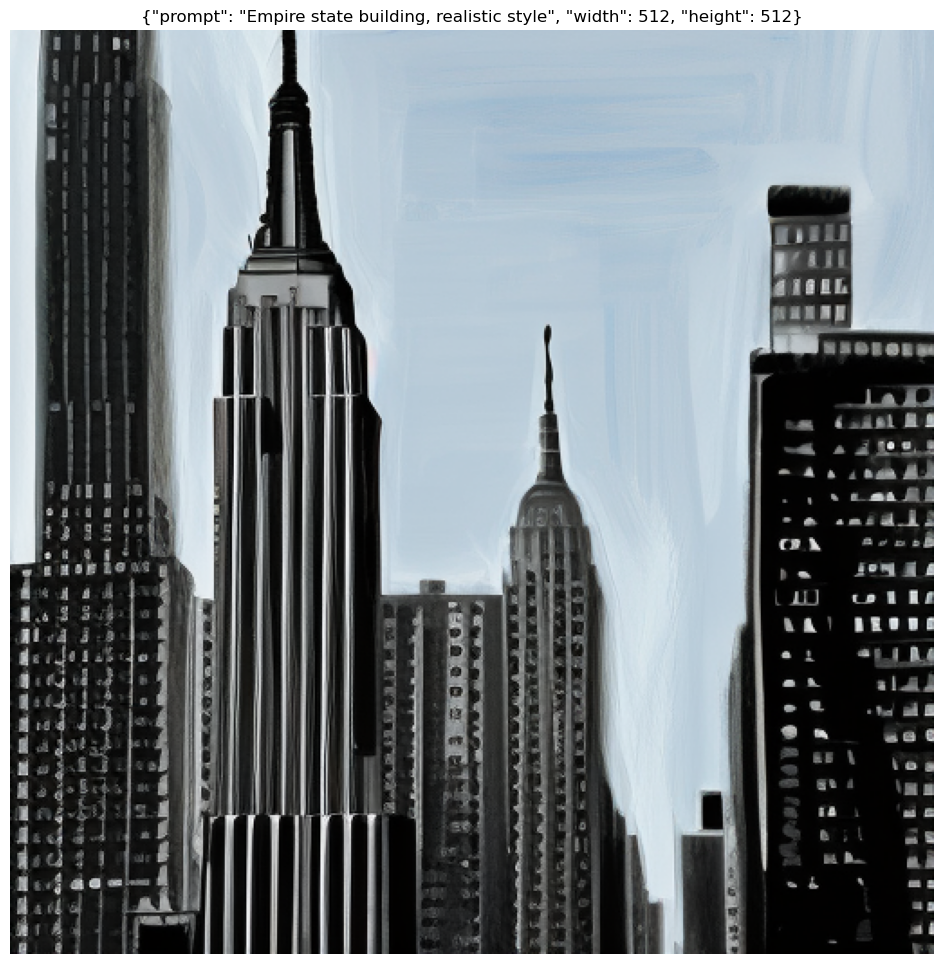

In [41]:
display_img_and_prompt(img,prompt)

## Negative Prompting

In [100]:
prompt_text = "landscape of the beautiful Time Square in New York city sunny day, amazing weather, street view, digital painting, highly detailed, intricate, without duplication, concept art"
negative_prompt = "Solid background"
content_type = "application/x-text"
accept = "application/json"
image_w = 512
image_h = 512
seed = 47
num_inference_steps = 100

payload = {"prompt": prompt_text, "width": image_w, "height": image_h, "seed": seed, "negative_prompt": negative_prompt, "num_inference_steps": num_inference_steps}
encoded_payload = json.dumps(payload).encode("utf-8")

query_response = ezonsm.predictor.predict(
        encoded_payload,
        {
            "ContentType": content_type,
            "Accept": accept,
        },
    )

In [101]:
img,prompt = query_response["generated_image"], query_response["prompt"]

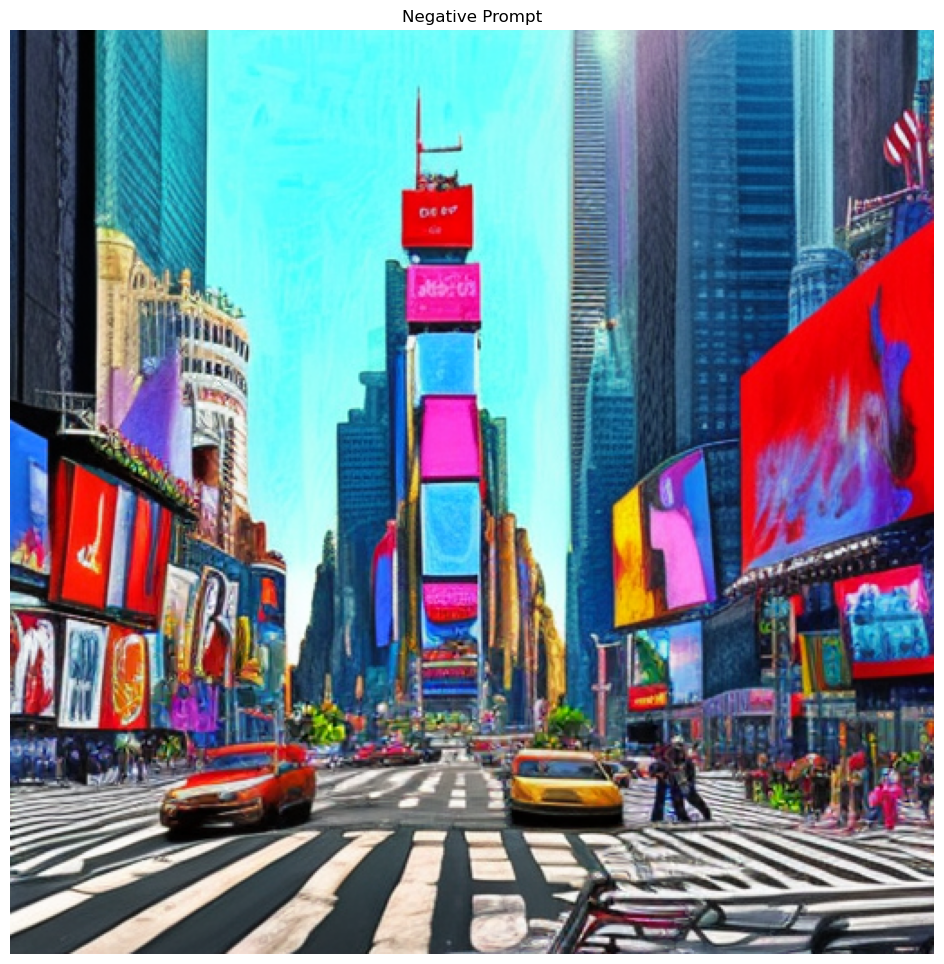

In [102]:
display_img_and_prompt(img,"Negative Prompt")

## Clean up the endpoint

In [104]:
ezonsm.predictor.delete_model()
ezonsm.predictor.delete_endpoint()